# Result findings - meta results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from PIL import Image

## Several experiments

### Correctness
Experiments with:
- Number of clusters
- Number of representatives
- Shrinking factor
- Number of partitions
- Sample size

#### Number of clusters

We set:
- 4 representatives
- 0.5 shrinking factor
- 5 partitions
- 169240 total points - dataset with 16924 points with x10 cardinality
- sample size 13773 - sample ratio 0.08

Discussion:

We tried 10, 8, 5, 3 and 2 clusters.

Silhouette score gradually increases up to 5 clusters and then gradually decreases as the number of clusters increase.

The sum of squares within error steadily decreases as the number of clusters increase. <br>
This is natural due to smaller distances of points from their means, since clusters get smaller as the number of the predicted clusters increase.

We also observe a few peculiarities where clusters can overlap, especially in lower numbers of clusters.

In [2]:
src = 'results/noOutliers/clustering/clusters/'

In [3]:
pattern = '(?<=clusters)\d+(?=_)'

slht = {}
wsse = {}
for d in os.listdir(src):
    if d.endswith('_1'):
        match = int(re.search(pattern, d).group())
        scores = pd.read_csv(src + d + '/scores.csv')
        slht[match] = scores[scores['score'] == 'silhouette score']['value'].item()
        wsse[match] = scores[scores['score'] == 'sum of squares within']['value'].item()

slht = dict(sorted(slht.items()))
wsse = dict(sorted(wsse.items()))

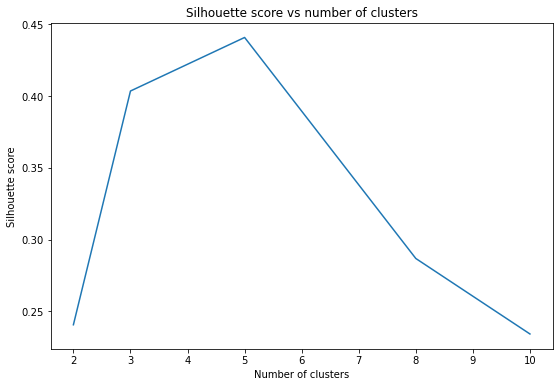

In [4]:
fig = plt.figure(figsize=(9,6))
plt.plot(slht.keys(), slht.values())
plt.title("Silhouette score vs number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

fig.savefig(src + 'silhouette.png')

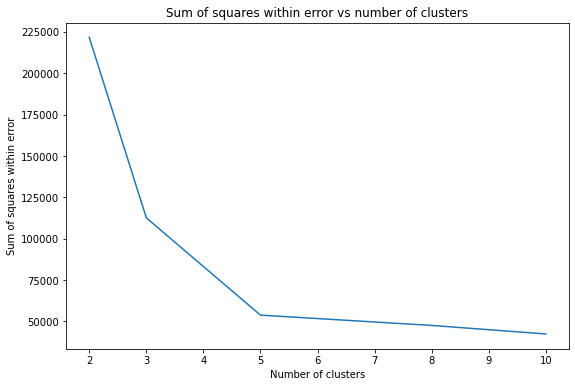

In [5]:
fig = plt.figure(figsize=(9,6))
plt.plot(wsse.keys(), wsse.values())
plt.title("Sum of squares within error vs number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares within error")
plt.show()

fig.savefig(src + 'wsse.png')

In low numbers of clusters clusters can overlap.

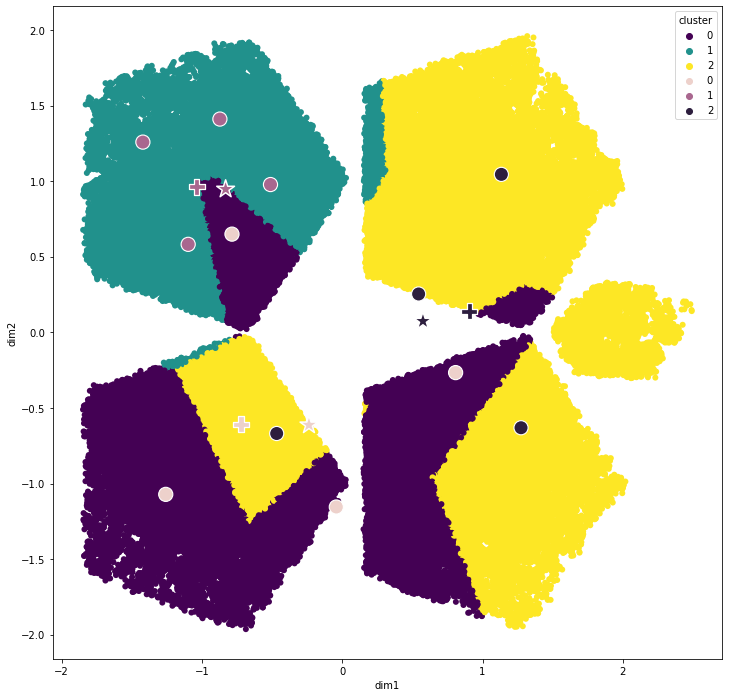

,score,value
0,silhouette score,0.146358
1,sum of squares within,188756.937327


In [6]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'clusters3_repr4_alpha0.5_partitions5_sampleSize13773_total169240_peculiar1/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'peculiarity.png')

scores_df

#### Number of representatives

We set:
- 5 clusters
- 4 representatives
- 5 partitions
- 169240 total points - dataset with 16924 points with x10 cardinality
- sample size 13773 - sample ratio 0.08

Discussion:

We tried 1, 2, 3, 4, 5 and 7 representatives.

Clustering quality heavily improved with for higher numbers of representatives with higher silhouette scores and lower sum of squares within errors.

We also observed some cases when a cluster can be lost due to having less than 4 representatives.

In [7]:
src = 'results/noOutliers/clustering/representatives/'

In [8]:
pattern = '(?<=repr)\d+(?=_)'

slht = {}
wsse = {}
for d in os.listdir(src):
    if d.endswith('_1'):
        match = int(re.search(pattern, d).group())
        scores = pd.read_csv(src + d + '/scores.csv')
        slht[match] = scores[scores['score'] == 'silhouette score']['value'].item()
        wsse[match] = scores[scores['score'] == 'sum of squares within']['value'].item()

slht = dict(sorted(slht.items()))
wsse = dict(sorted(wsse.items()))

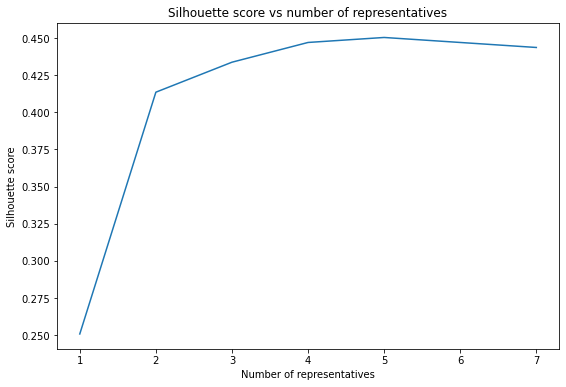

In [9]:
fig = plt.figure(figsize=(9,6))
plt.plot(slht.keys(), slht.values())
plt.title("Silhouette score vs number of representatives")
plt.xlabel("Number of representatives")
plt.ylabel("Silhouette score")
plt.show()

fig.savefig(src + 'silhouette.png')

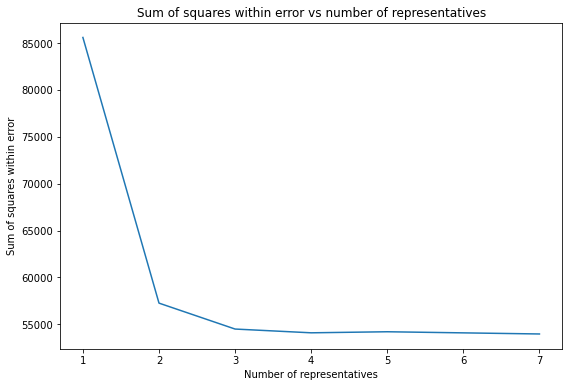

In [10]:
fig = plt.figure(figsize=(9,6))
plt.plot(wsse.keys(), wsse.values())
plt.title("Sum of squares within error vs number of representatives")
plt.xlabel("Number of representatives")
plt.ylabel("Sum of squares within error")
plt.show()

fig.savefig(src + 'wsse.png')

Despite defining 5 clusters, we retrieve back 4.

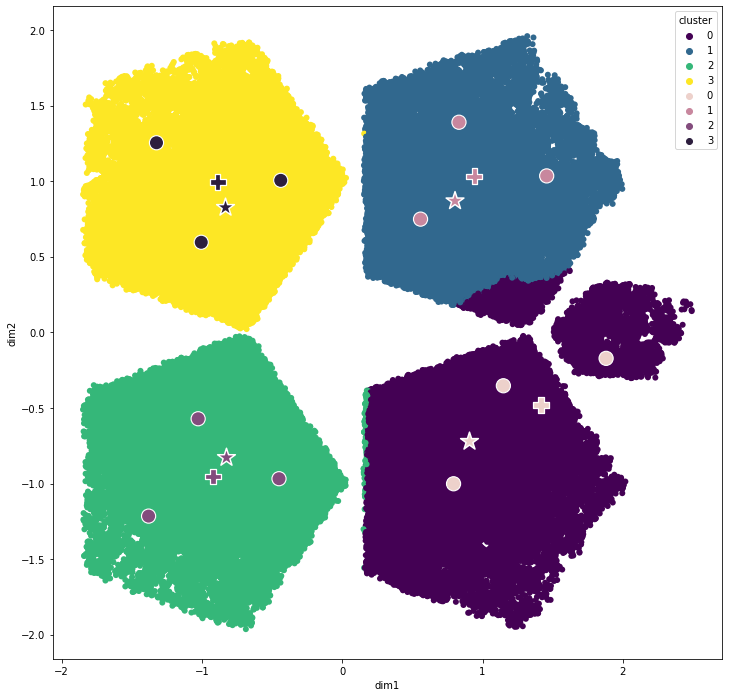

,score,value
0,silhouette score,0.483697
1,sum of squares within,61069.470959


In [11]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'clusters5_repr3_alpha0.5_partitions5_sampleSize13773_total169240_alternate1/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'peculiarity.png')

scores_df

#### Shrinking factor

We set:
- 5 clusters
- 4 representatives
- 5 partitions
- 169240 total points - dataset with 16924 points with x10 cardinality
- sample size 13773 - sample ratio 0.08

Discussion:

We tried 0.25, 0.35, 0.5, 0.7 and 0.9 shrinking factor.

Low shrinking factors displayed worse silhouette scores and sum of squares within errors.

In [12]:
src = 'results/noOutliers/clustering/shrinkingFactor/'

In [13]:
pattern = '(?<=alpha)0.\d+(?=_)'

slht = {}
wsse = {}
for d in os.listdir(src):
    if not d.endswith('.png'):
        match = float(re.search(pattern, d).group())
        scores = pd.read_csv(src + d + '/scores.csv')
        slht[match] = scores[scores['score'] == 'silhouette score']['value'].item()
        wsse[match] = scores[scores['score'] == 'sum of squares within']['value'].item()

slht = dict(sorted(slht.items()))
wsse = dict(sorted(wsse.items()))

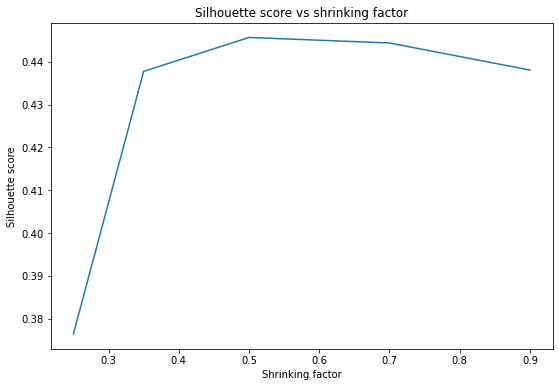

In [14]:
fig = plt.figure(figsize=(9,6))
plt.plot(slht.keys(), slht.values())
plt.title("Silhouette score vs shrinking factor")
plt.xlabel("Shrinking factor")
plt.ylabel("Silhouette score")
plt.show()

fig.savefig(src + 'silhouette.png')

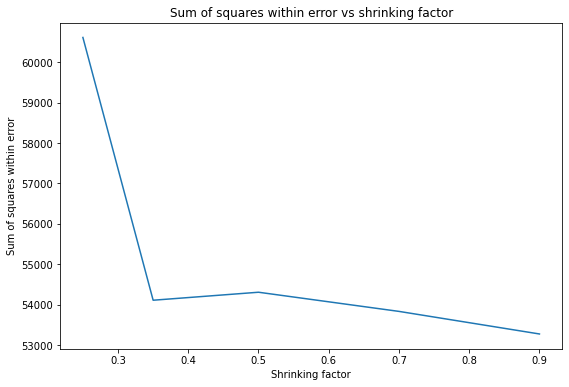

In [15]:
fig = plt.figure(figsize=(9,6))
plt.plot(wsse.keys(), wsse.values())
plt.title("Sum of squares within error vs shrinking factor")
plt.xlabel("Shrinking factor")
plt.ylabel("Sum of squares within error")
plt.show()

fig.savefig(src + 'wsse.png')

#### Number of partitions

We set:
- 5 clusters
- 4 representatives
- 0.5 shrinking factor
- 169240 total points - dataset with 16924 points with x10 cardinality
- sample size 13773 - sample ratio 0.08

Discussion:

We tried 1, 2, 3, 4, 5, 7 and 10 partitions.

Clustering quality was not affected and was very good, we observed however that for lower numbers of partitions a cluster can be occasionally lost.

In [16]:
src = 'results/noOutliers/clustering/partitions/'

Lower number of partitions can cause a cluster to be lost.

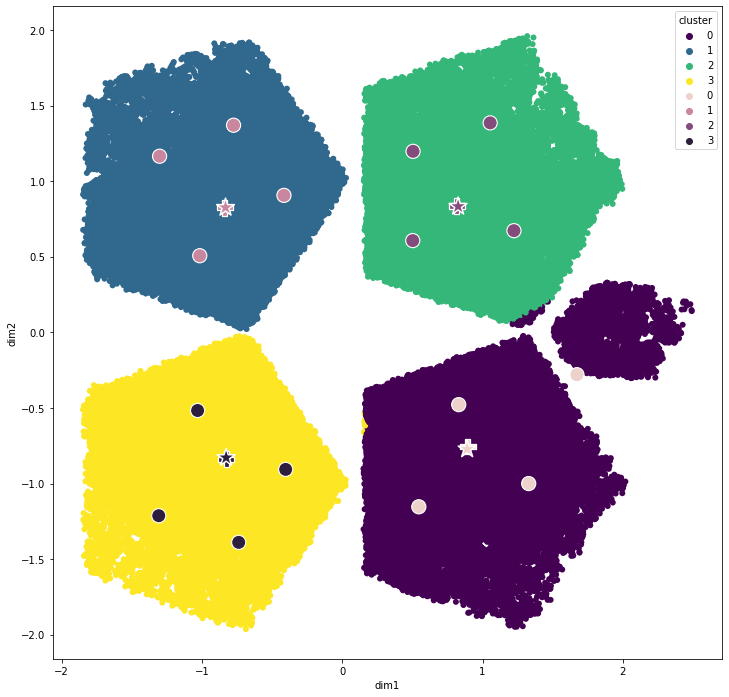

,score,value
0,silhouette score,0.497706
1,sum of squares within,59832.957759


In [17]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'clusters5_repr4_alpha0.5_partitions1_sampleSize13773_total169240_alternate/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'peculiarity.png')

scores_df

#### Sample size

We set:
- 5 clusters
- 4 representatives
- 0.5 shrinking factor
- 5 partitions
- 169240 total points - dataset with 16924 points with x10 cardinality

We tried sample sizes of 1000, 2000, 3500, 5000, 8000, 13000, 20000 and 50000.

Clustering quality was very good but we observed a cluster being occasionally lost for sample sizes of 1000, 2000, as well as 13000.

In [18]:
src = 'results/noOutliers/clustering/sampleSize/'

For sample size ~1000 4 clusters were retrieved, despite specifying a number of 5 clusters.

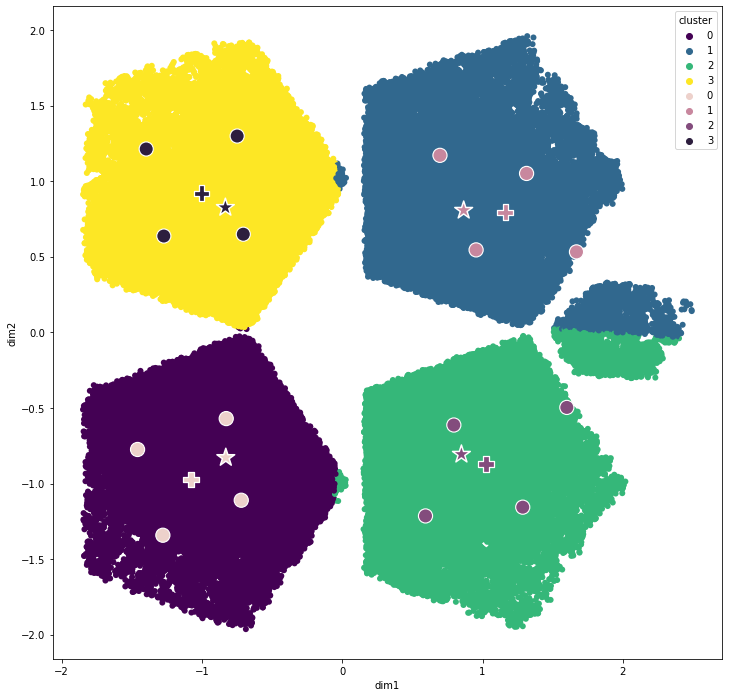

,score,value
0,silhouette score,0.492401
1,sum of squares within,59315.831889


In [19]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'clusters5_repr4_alpha0.5_partitions5_sampleSize1019_total169240_2/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'peculiarity.png')

scores_df

#### Bonus: best results

The best results in clustering quality were observed for the following parameters:
- 5 clusters
- 4 representatives
- 0.5 shrinking factor
- 5 partitions
- sample size 8035
- 169240 total points - dataset with 16924 points with x10 cardinality

Very few points were misclassified in other clusters, while the silhouette score was 0.454664 and the sum of squares within error was 54501.904594. Despite this being our best test, silhouette score and sum of squares within error was not the highest and lowest, respectively, among tests with 5 clusters, which we attribute to the fact that sometimes misclassifying points, especially in the center right small cluster, can produce smaller clusters on average, and therefore better metric results.

In [20]:
src = 'results/noOutliers/clustering/'

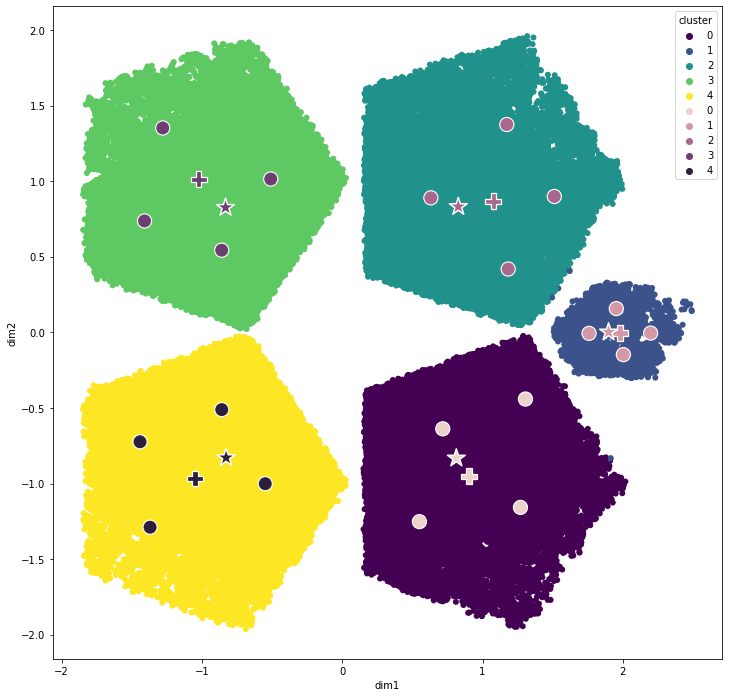

,score,value
0,silhouette score,0.454664
1,sum of squares within,54501.904594


In [21]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'sampleSize/clusters5_repr4_alpha0.5_partitions5_sampleSize8035_total169240_2/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')
scores_df.to_csv(src + 'best_results_scores.csv')

hyperparams_df = pd.DataFrame([['clusters', 5], 
                               ['representatives', 4],
                               ['shrinking factor', 0.5],
                               ['partitions', 5],
                               ['sample size', 8035],
                               ['total points', 169240]], columns=['parameter', 'value'])
hyperparams_df.to_csv(src + 'best_results_hyperparams.csv', index=False)

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'best_results_figure.png')

scores_df

### Scalability
Experiments with:
- Sample size
- Number of partitions

We set:
- 5 clusters
- 4 representatives
- 0.5 shrinking factor
- 1692400 total points - dataset with 16924 points with x100 cardinality

Machine:
- 24 Gb RAM
- Ryzen 5 1600X, 6-core, 12-threads

Discussion:

Our experiments were tested on a 12-thread machine, we therefore expected running times to get smaller as we approach number of partitions closer to 12.

We tested for 1, 2, 4, 6, and 12 partitions, as well as sample sizes of 50000, 100000 and 200000 points.

From our experiments, using 1 partition had a much worse performance than using 2 partitions or more. Our best results were obtained using 12 partitions, albeit not much better than when using 6 partitions.

In [22]:
src = 'results/noOutliers/scalability/'

In [23]:
running_time = pd.read_csv(src + 'running_time.csv')
running_time

,sample_size,1,2,4,6,12
0,50000,29,10,5.8,5.6,5.7
1,100000,153,30,12.0,8.4,7.5
2,200000,759,160,50.0,30.0,20.0


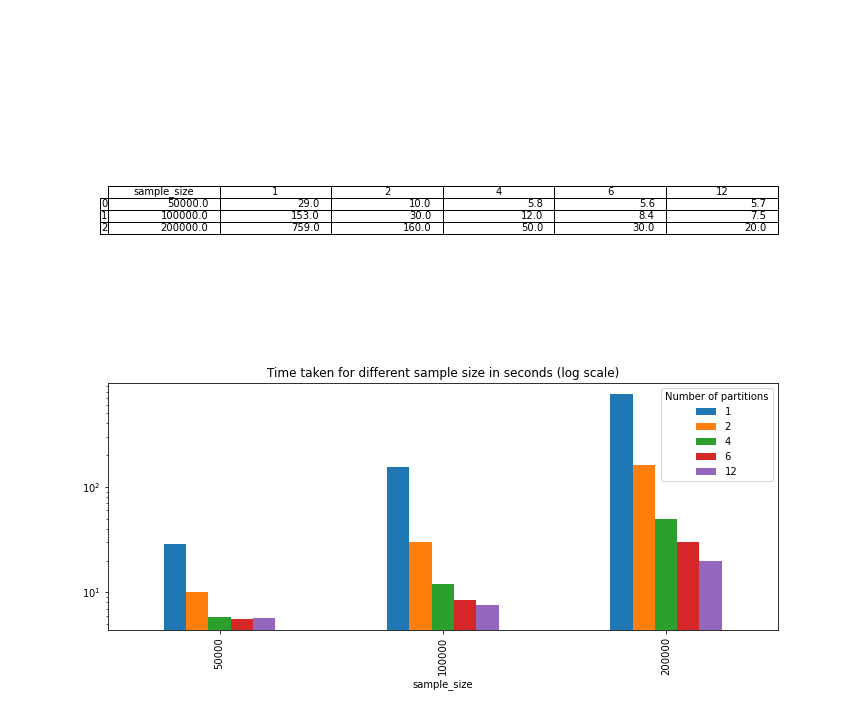

In [24]:
Image.open(src + 'figure.png')

### KMeans + Agglomerative results
Experiments with:
- Number of initial clusters
- Number of final clusters

We set:
- 169240 total points - dataset with 16924 points with x10 cardinality
- 100 maximum K-Means iterations

Discussion:

In our experiments we used 5, 20, 50, 100 initial clusters and 2, 5 and 10 final clusters.

The performance of the agglomerative algorithm on top of the K-Means predicted clusters was very good, and better than the performance of the CURE algorithm, which we attribute to the power of agglomeration. We must however consider the power of CURE, which specifically lies in its distributed nature over the agglomerative clustering algorithm and improved clustering quality over regular K-Means.

Consequently, silhouette scores and sum of squares within errors were very good and for initial clusters higher than 20 and final clusters equal to 5 we observed a perfect fit to the 5 clusters of the data.

In [25]:
src = 'results/kMeansAgglomerative/clustering/'

In [26]:
initial_clusters_pattern = '(?<=initialClusters)\d+(?=_)'
final_clusters_pattern = '(?<=finalClusters)\d+(?=_)'

slht = {}
wsse = {}
for d in os.listdir(src):
    if not d.endswith('.png'):
        init_clust_match = int(re.search(initial_clusters_pattern, d).group())
        final_clust_match = int(re.search(final_clusters_pattern, d).group())
        if init_clust_match not in slht:
            slht[init_clust_match] = {}
            wsse[init_clust_match] = {}
        scores = pd.read_csv(src + d + '/scores.csv')
        slht[init_clust_match][final_clust_match] = scores[scores['score'] == 'silhouette score']['value'].item()
        wsse[init_clust_match][final_clust_match] = scores[scores['score'] == 'sum of squares within']['value'].item()

slht = dict(sorted(slht.items()))
wsse = dict(sorted(wsse.items()))

for slth_item, wsse_item in zip(slht.items(), wsse.items()):
    slht[slth_item[0]] = dict(sorted(slth_item[1].items()))
    wsse[wsse_item[0]] = dict(sorted(wsse_item[1].items()))

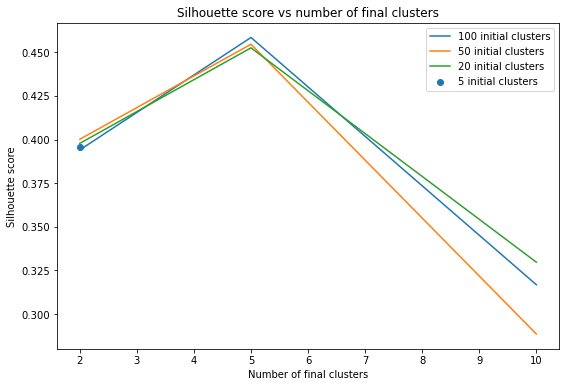

In [27]:
fig = plt.figure(figsize=(9,6))
plt.title("Silhouette score vs number of final clusters")
plt.xlabel("Number of final clusters")
plt.ylabel("Silhouette score")
legend_labels = []
for init_clust, slht_value in slht.items():
    if len(slht_value) == 1:
        plt.scatter(slht_value.keys(), slht_value.values())
    else:
        plt.plot(slht_value.keys(), slht_value.values())
    legend_labels.append(str(init_clust) + ' initial clusters')
legend_labels.reverse()
plt.legend(legend_labels)
plt.show()

fig.savefig(src + 'silhouette.png')

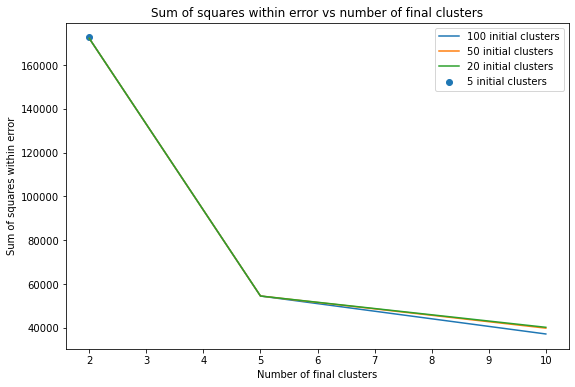

In [28]:
fig = plt.figure(figsize=(9,6))
plt.title("Sum of squares within error vs number of final clusters")
plt.xlabel("Number of final clusters")
plt.ylabel("Sum of squares within error")
legend_labels = []
for init_clust, wsse_value in wsse.items():
    if len(wsse_value) == 1:
        plt.scatter(wsse_value.keys(), wsse_value.values())
    else:
        plt.plot(wsse_value.keys(), wsse_value.values())
    legend_labels.append(str(init_clust) + ' initial clusters')
legend_labels.reverse()
plt.legend(legend_labels)
plt.show()

fig.savefig(src + 'wsse.png')

### Outlier filtering - Clustering correctness

Experiments with:
- Number of clusters

We set:
- 4 representatives
- 0.5 shrinking factor
- 5 partitions
- 169240 total points - dataset with 16924 points with x10 cardinality
- sample size 13428, sample ratio 0.08

Discussion:

In our experiments we tried with 2, 3, 5, 8 and 10 clusters.

When filtering outliers, the results were good, with 5 clusters specifically being a very good fit regarding the 5 observed clusters of our data.

When not filtering outliers, however, we observed that certain clusters can be lost due to lack in number of representatives in those clusters.

For 2 clusters, for example, we never managed to retrieve 2 clusters, but instead regularly got back 1 cluster only. For this reason, the silhouette score in this case could not be calculated.

In [29]:
src = 'results/wOutliers/clustering/'

When not filtering outliers for 2 clusters we get back only 1 cluster.

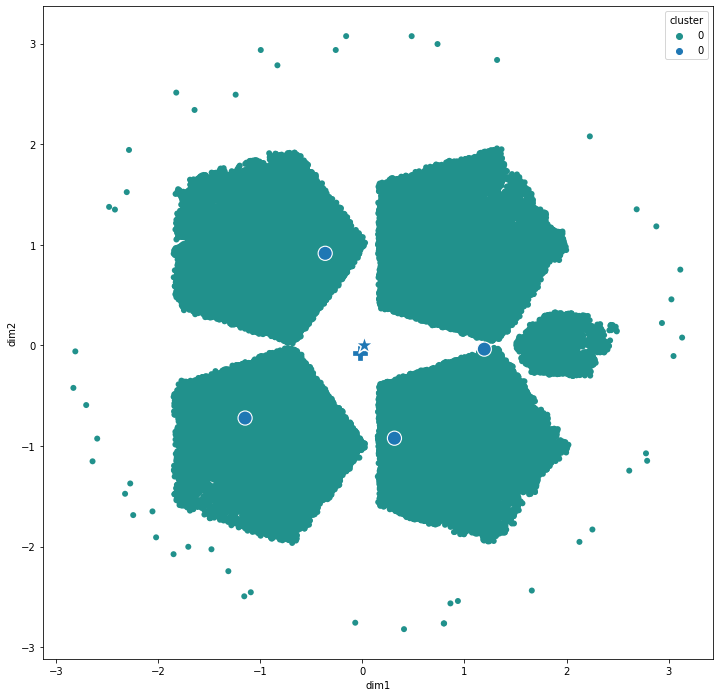

,score,value
0,silhouette score,NaN
1,sum of squares within,293365.031065


In [30]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'noFiltering_clusters2_repr4_alpha0.5_partitions5_sampleSize13428_total169290/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'peculiarity1.png')

scores_df

When not filtering outliers for 8 clusters we get back only 5 cluster.

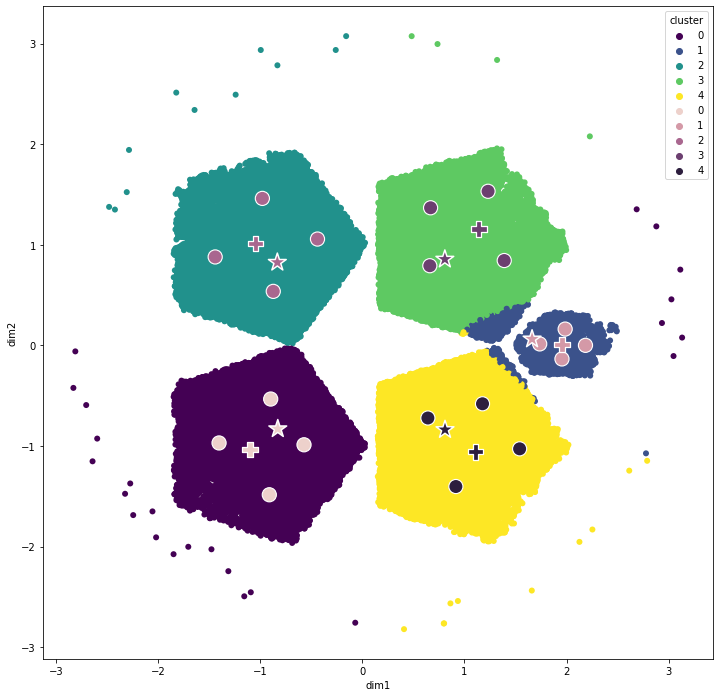

,score,value
0,silhouette score,0.445077
1,sum of squares within,54047.707050


In [31]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'noFiltering_clusters8_repr4_alpha0.5_partitions5_sampleSize13428_total169290/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'peculiarity2.png')

scores_df

When filtering outliers for 5 clusters we get a very good fit.

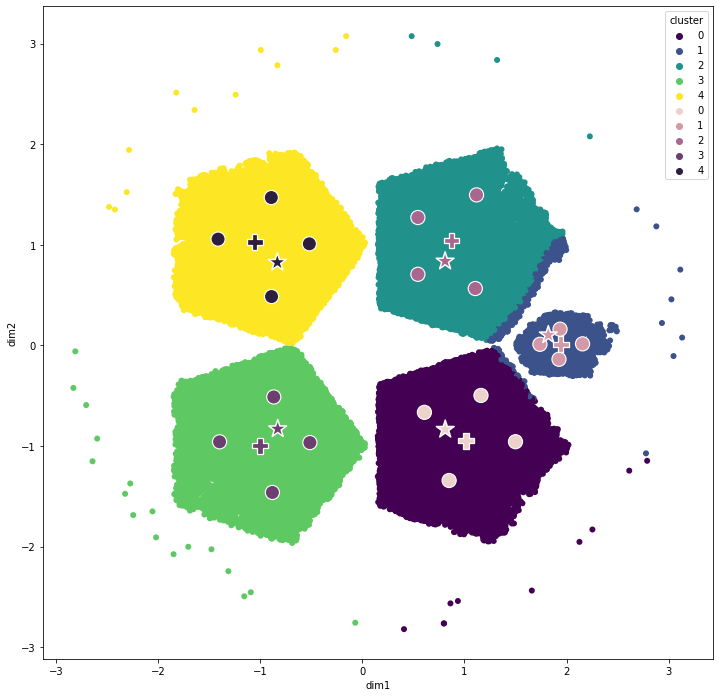

,score,value
0,silhouette score,0.455981
1,sum of squares within,54223.128842


In [32]:
cols = ['dim1', 'dim2', 'cluster']

plot_src = src + 'wFiltering_clusters5_repr4_alpha0.5_partitions5_sampleSize13428_total169290/'

df = pd.read_csv(plot_src + 'part-00000', header=None)\
.append(pd.read_csv(plot_src + 'part-00001', header=None))\
.reset_index(drop=True)
df.columns = cols

reps = pd.read_csv(plot_src + 'representatives.txt', header=None, names=cols)
means = pd.read_csv(plot_src + 'means.txt', header=None, names=cols)
data_means = df.groupby('cluster').mean()

scores_df = pd.read_csv(plot_src + 'scores.csv')

fig = plt.figure(figsize=(12, 12))
sns.scatterplot(x='dim1', y='dim2', hue='cluster', palette='viridis', linewidth=0, data=df)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=200, data=reps)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=250, marker='P', data=means, legend=False)
sns.scatterplot(x='dim1', y='dim2', hue='cluster', s=350, marker='*', data=data_means, legend=False)
plt.show()
fig.savefig(src + 'best_fit.png')

scores_df